## Carga de datos

In [2]:
import pandas as pd
import numpy as np

print("|                    |\n")
df1 = pd.read_csv(u"datos_limpios/2011.csv")
df2 = pd.read_csv(u"datos_limpios/2012.csv")
print("|████                |\n")
df3 = pd.read_csv(u"datos_limpios/2013.csv")
df4 = pd.read_csv(u"datos_limpios/2014.csv")
print("|████████            |\n")
df5 = pd.read_csv(u"datos_limpios/2015.csv")
df6 = pd.read_csv(u"datos_limpios/2016.csv")
print("|████████████        |\n")
df7 = pd.read_csv(u"datos_limpios/2017.csv")
df8 = pd.read_csv(u"datos_limpios/2018.csv")
print("|████████████████    |\n")
df9 = pd.read_csv(u"datos_limpios/2019.csv")
df10 = pd.read_csv(u"datos_limpios/2020.csv")
print("|████████████████████|\n")

|                    |

|████                |

|████████            |

|████████████        |

|████████████████    |

|████████████████████|



# Exploración

Primero buscamos correlaciones en los datos:

In [21]:
dfimpar = pd.concat([df1, df3, df5, df7, df9])
correlation = dfimpar.corr()
correlation.to_csv( 'corrImpares.csv')
correlation

,cat_periodo,MRUN,GEN_ALU,FEC_NAC_ALU,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,sem_ing_carr_act,cod_inst,cod_sede,cod_carrera,version,dur_estudio_carr,dur_proceso_tit,dur_total_carr,valor_matricula,valor_arancel,codigo_demre,acre_inst_anio
cat_periodo,1.000000,0.004271,0.010031,0.348941,-0.056163,-0.031212,0.057512,-0.042850,0.000463,0.051652,0.150805,0.151471,-0.016154,-0.081093,-0.039906,0.146904,0.228257,-0.136485,0.046078
MRUN,0.004271,1.000000,-0.001293,-0.000320,-0.001610,0.001190,0.001287,0.001410,0.000455,0.000198,0.002711,0.001169,-0.003351,-0.000915,-0.003358,-0.000898,0.000732,-0.003493,0.000385
GEN_ALU,0.010031,-0.001293,1.000000,0.012868,-0.045268,-0.004859,0.004086,-0.020948,-0.028611,-0.034698,-0.019768,-0.007330,-0.007100,0.054523,-0.004768,-0.060674,-0.036819,0.012826,-0.125230
FEC_NAC_ALU,0.348941,-0.000320,0.012868,1.000000,-0.081476,-0.161139,-0.008807,-0.138536,-0.007068,0.032091,-0.090608,-0.036349,0.250081,-0.063797,0.234007,0.187515,0.234637,0.223021,0.128014
anio_ing_carr_ori,-0.056163,-0.001610,-0.045268,-0.081476,1.000000,0.059813,0.024730,0.137080,-0.025375,0.087885,-0.017306,0.016964,0.031357,-0.036088,0.029351,0.039536,-0.059587,-0.037696,-0.030514
sem_ing_carr_ori,-0.031212,0.001190,-0.004859,-0.161139,0.059813,1.000000,0.007878,0.784782,-0.012388,-0.029147,0.043858,0.023924,-0.085194,-0.005686,-0.081444,-0.034590,-0.019774,-0.056840,0.026306
anio_ing_carr_act,0.057512,0.001287,0.004086,-0.008807,0.024730,0.007878,1.000000,0.340686,0.017184,0.044569,-0.008217,0.007089,-0.065674,0.055816,-0.062400,0.015960,-0.025137,-0.036804,-0.062002
sem_ing_carr_act,-0.042850,0.001410,-0.020948,-0.138536,0.137080,0.784782,0.340686,1.000000,-0.016969,0.010532,0.002627,0.028527,-0.063263,0.018395,-0.057505,-0.014438,-0.045040,-0.063071,-0.012825
cod_inst,0.000463,0.000455,-0.028611,-0.007068,-0.025375,-0.012388,0.017184,-0.016969,1.000000,0.292310,-0.030063,0.020545,-0.464785,0.019760,-0.453221,-0.182378,-0.388222,-0.336793,0.075275
cod_sede,0.051652,0.000198,-0.034698,0.032091,0.087885,-0.029147,0.044569,0.010532,0.292310,1.000000,0.074451,0.057753,-0.291004,-0.053806,-0.308588,-0.025102,-0.303785,-0.356445,-0.054616


In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
nulos, l, l_total, anno, porcentaje = [], [], [], [], []
i = 2011

for df in d:
    n = 0
    for v in list(df.isnull().sum()):
        n += v
    anno.append(i)
    nulos.append(n)
    t = len(df)*len(list(df))*1.0
    l.append(len(df))
    porcentaje.append((n/t)*100)
    i+=1

df_datos_faltantes = pd.read_csv("datos_faltantes.csv", sep = ",")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [11, 5.5]


fig_total_datos = plt.figure()
fig_total_datos.clf()
ax_total_datos = fig_total_datos.add_subplot(111)
#ax_total_datos.bar(anno, l, align='center', alpha=0.7, color = 'darkorange', label = "Entradas en la tabla")
ax_total_datos.plot(anno, l, alpha=1, color = 'darkorange', label = "Entradas en la tabla")
ax_total_datos.plot(anno, l, 'o', alpha=1, color = 'firebrick', label = "Entradas en la tabla")
ax_total_datos.set_ylabel("Total de datos")
ax_total_datos.set_xlabel("Año de los datos")
ax_total_datos.set_title("Cantidad de datos recolectados para cada año")
#set off Scientific notation from Y-axis
ax_total_datos.get_yaxis().get_major_formatter().set_useOffset(False)
ax_total_datos.get_yaxis().get_major_formatter().set_scientific(False)
#ax_total_datos.legend(loc="best")
fig_total_datos.savefig("total_datos.png", transparent=False)
fig_total_datos.show()


fig_porcentaje_nulo = plt.figure()
fig_porcentaje_nulo.clf()
ax_porcentaje_nulo = fig_porcentaje_nulo.add_subplot(111)
graph = ax_porcentaje_nulo.bar(anno, porcentaje, align='center', color = 'firebrick', label = "Porcentaje de datos nulos")
ax_porcentaje_nulo.bar([2016], [14], align='center', alpha=0)
ax_porcentaje_nulo.set_ylabel("Porcentaje respecto al total de datos")
ax_porcentaje_nulo.set_xlabel("Año de los datos")
ax_porcentaje_nulo.set_title("Porcentaje de datos nulos en los datos recolectados para cada año")
#fig_porcentaje_nulo.legend(loc="upper left")
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    num = str(porcentaje[i]).split(".")
    t = num[0] +'.' + num[1][:2]+'%'
    plt.text(x+width/2,
             y+0.5+height*1,
             t,
             ha='center')
             #weight='bold')
    i+=1
fig_porcentaje_nulo.savefig("porcentaje_datos_nulos.png", transparent=False)
fig_porcentaje_nulo.show()

In [ ]:
df_porcentaje_total = pd.DataFrame({"porcentaje_total":porcentaje})

df_datos_faltantes["proporcion"]=(100*df_datos_faltantes[["porcentaje"]])/df_porcentaje_total[["porcentaje_total"]]

df_datos_faltantes[["porcentaje_total"]]=df_porcentaje_total[["porcentaje_total"]]
df_datos_faltantes.rename(columns={"porcentaje":"porcentaje_datos_faltantes"}).to_csv("datos_faltantes.csv", index = False)

In [ ]:
# Esta celda se demora harto, hacerla correr con precaucion

plt.rcParams['figure.figsize'] = [18, 15]
df8.hist()
pyplot.show()

pd.plotting.scatter_matrix(df8)
pyplot.show()

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

for df in d:
    #obtenemos el porcentaje de nulos en cada columna

    print('{:>35}'.format("Porcentaje de Datos NaN por Columna"))
    print('{:>35}'.format("-"*36))
    print('{:<25} | {:>12}'.format("Columna", "Porcentaje"))
    print('{:>35}'.format("-"*36))

    for key, value in df.isnull().sum().items():
      print('{:<25} | {:>12}%'.format(key, round(value*100/df.shape[0], 2)))

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

for df in d:
    for c in list(df):
        print(c)
        try:
            display(df[[c]].drop_duplicates().sort_values(c))
        except:
            display(df[[c]].drop_duplicates())

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

for df in d:
    display(df[["area_conocimiento"]].drop_duplicates().sort_values("area_conocimiento"))

## Hipótesis 1

**¿Qué áreas de conocimiento tienen un mayor porcentaje de ingreso a través de convalidación de ramos o carreras? ¿hay alguna diferencia por edad o género?**

Lo siguiente solo considera pregrado

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
h1 = []
i = 2011

for df in d:
    dfh = (df.query("(cat_periodo != anio_ing_carr_ori or sem_ing_carr_ori!=1) and cat_periodo == anio_ing_carr_act and (nivel_global=='Pregrado' or nivel_global.isnull())")[["GEN_ALU","rango_edad", "area_conocimiento"]]
        .groupby(by=["GEN_ALU","rango_edad", "area_conocimiento"])
        .size()
        .reset_index()
        .rename(columns = {0:'total'})
        )
    dfh["anio"] = [i]*len(dfh)
    i+=1

    h1.append(dfh.copy())

#concatenación y mapeo
dfh1_original = (pd.concat(h1)[["GEN_ALU","rango_edad", "area_conocimiento", "total"]]
                 .groupby(by=["GEN_ALU","rango_edad", "area_conocimiento"])
                 .mean()
                 .reset_index()
                )
dfh1_original[["GEN_ALU"]] = dfh1_original[["GEN_ALU"]].replace({1:"Hombre", 2:"Mujer"})
dfh1_original = (dfh1_original.replace({"SIN INFORMACION": "Sin información", "Ciencias Sociales": "C. Sociales"}))

In [ ]:
dfh1_aux = dfh1_original.copy().query("area_conocimiento!='Sin área definida'")

a = dfh1_aux[["GEN_ALU", "area_conocimiento", "total"]].sort_values(by=["GEN_ALU", "area_conocimiento"]).groupby(by=["GEN_ALU", "area_conocimiento"]).sum().reset_index()
a[["total"]] = a[["total"]].astype(np.int64)
a = a.rename(columns={"area_conocimiento":"target", "GEN_ALU":"source", "total":"value"})

b = dfh1_aux[["rango_edad", "area_conocimiento", "total"]].sort_values(by=["rango_edad", "area_conocimiento"]).groupby(by=["rango_edad", "area_conocimiento"]).sum().reset_index()
b[["total"]] = b[["total"]].astype(np.int64)
b = b.rename(columns={"rango_edad":"target", "area_conocimiento":"source", "total":"value"})

k = pd.concat([a,b])
k.to_csv("h1_data\h1_sankey_mean.csv", index=False)
k

### Resumen de los datos
#### Originales

In [ ]:
display(dfh1_original.info())

display(dfh1_original.describe())

#### Mapeados

In [ ]:
display(dfh1_mapeado.info())

display(dfh1_mapeado.describe())

In [ ]:
import plotly.express as px
df = dfh1_mapeado[["area_conocimiento","total", "GEN_ALU", "rango_edad"]]
fig = px.parallel_coordinates(df, color="rango_edad", dimensions=["area_conocimiento","total", "GEN_ALU"]
                              , labels={'GEN_ALU': "Género",
                                        'rango_edad': "Edad",
                                        'area_conocimiento': "Área de conocimiento"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=28,
                             title="Características de matriculados en educ. superior por convalidación de ramos")
fig.show()

## Hipótesis 2
**La educación está centralizada, lo que deriva en que la mayor oferta académica, en cuantos a niveles, se encuentre en la región metropolitana. Se espera que tenga una tendencia descentralizarse a través de los años.**



In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
h2 = []
i = 2011

for df in d:
    try:
        dfh = df.query("vigencia_carrera!='NO VIGENTE'")
    except:
        dfh = df
    dfh = (dfh[["codigo_unico","region_sede", "nivel_carrera_2"]].copy())

    dfh["anio"] = [i]*len(dfh)
    i+=1
    h2.append(dfh)

dfh2_original = pd.concat(h2)

dfh2_original = (dfh2_original[["anio", "codigo_unico","region_sede", "nivel_carrera_2"]]
                 .drop_duplicates()[["anio", "region_sede", "nivel_carrera_2"]]
                 .groupby(["anio", "region_sede", "nivel_carrera_2"])
                 .size()
                 .reset_index()
                 .rename(columns = {0:'total'})
                 .fillna(0)
                )


In [ ]:
nivel_carrera = list(dfh2_original[["nivel_carrera_2"]].drop_duplicates()["nivel_carrera_2"])
regiones = ['Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama', 'Coquimbo', 'Valparaíso', 'Metropolitana', "Lib. Gral B. O'Higgins", 'Maule', 'Ñuble', 'Biobío', 'La Araucanía', 'Los Ríos', 'Los Lagos', 'Aysén', 'Magallanes']
dict_aux = {"anio":[], "nivel_carrera_2":[], "region_sede":[]}
for i in [2011, 2015, 2019]:
    n = 0
    for r in regiones:
        dict_aux["nivel_carrera_2"].extend(nivel_carrera)
        l = len(nivel_carrera)
        dict_aux["region_sede"].extend([r]*l)
        dict_aux["anio"].extend([i]*l)

dfh2_original = pd.merge(dfh2_original, pd.DataFrame(dict_aux), how="right", on=["anio", "region_sede", "nivel_carrera_2"]).fillna(0)

In [ ]:
df_poblacion_regiones = pd.read_csv("h2_data\poblacion_regiones.csv")
df_poblacion_regiones = (df_poblacion_regiones[["region_sede", "Poblacion"]]
                         .groupby(["region"])
                         .mean()
                         .reset_index()
                         .rename(columns = {"Poblacion":'poblacion_promedio'}))

dfh2_original = pd.merge(dfh2_original, df_poblacion_regiones, how ="inner", on = ["region_sede"])
dfh2_original["oferta_cada_1000personas"] =(dfh2_original.total*10000.0)/dfh2_original.poblacion_promedio



dfh2_mapeado = (dfh2_original.replace({"Carreras Profesionales": 1, "Carreras Técnicas": 2, "Doctorado": 3, "Magister": 4, "Postítulo": 5})
                    .replace({'Arica y Parinacota': 1, 'Tarapacá': 2, 'Antofagasta': 3, 'Atacama': 4, 'Coquimbo': 5, 'Valparaíso': 6, 'Metropolitana': 7, "Lib. Gral B. O'Higgins": 8, 'Maule': 9, 'Ñuble': 10, 'Biobío': 11, 'La Araucanía': 12, 'Los Ríos': 13, 'Los Lagos': 14, 'Aysén': 15, 'Magallanes': 16})
               )

In [ ]:
for lvl_carrera in list(dfh2_original[["nivel_carrera_2"]].drop_duplicates()["nivel_carrera_2"]):
    df = dfh2_original.query("nivel_carrera_2==@lvl_carrera")[["region_sede", "anio", "oferta_cada_1000personas"]].pivot(index="region_sede", columns = "anio", values="oferta_cada_1000personas").fillna(0)
    df.to_csv("h2_data\h2_"+lvl_carrera+".csv")

### Resultados
#### Orginales

In [ ]:
display(dfh2_original.info())

display(dfh2_original.describe())

#### Mapeados

In [ ]:
display(dfh2_mapeado.info())

display(dfh2_mapeado.describe())

## Hipótesis 3

**¿Existe una correlación entre el costo de las carreras y su ubicación geográfica? ¿Varía esto a través de los años?**



In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
h3 = []
i = 2011

for df in d:
    try:
        dfh = df.query("vigencia_carrera!='NO VIGENTE'")
    except:
        dfh = df
    dfh = (dfh[["codigo_unico","valor_arancel", "region_sede"]]
           .drop_duplicates()[["region_sede", "valor_arancel"]]
           .groupby(["region_sede"])
           .mean()
           .reset_index()
           .rename(columns = {"valor_arancel":'arancel_promedio_pesos'})
        )
    dfh["anio"] = [i]*len(dfh)
    i+=1
    h3.append(dfh.copy())

dfh3_original = pd.concat(h3)

df_UF = pd.read_csv("h3_data/UF.csv").rename(columns={"Periodo": "anio"})
df_UF["UF"] = df_UF["UF"].astype(float)
dfh3_original = pd.merge(dfh3_original, df_UF, how = "inner", on = ["anio"])
dfh3_original["arancel_promedio_UF"] = dfh3_original.arancel_promedio_pesos/dfh3_original.UF
dfh3_original = dfh3_original[["anio", "region_sede", "arancel_promedio_UF"]].sort_values("anio", ascending = False)

dfh3_mapeado = (dfh3_original.replace({'Arica y Parinacota': 1, 'Tarapacá': 2, 'Antofagasta': 3, 'Atacama': 4, 'Coquimbo': 5, 'Valparaíso': 6, 'Metropolitana': 7, "Lib. Gral B. O'Higgins": 8, 'Maule': 9, 'Ñuble': 10, 'Biobío': 11, 'La Araucanía': 12, 'Los Ríos': 13, 'Los Lagos': 14, 'Aysén': 15, 'Magallanes': 16}))
dfh3_mapeo_regiones = pd.DataFrame({"Region": ['Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama', 'Coquimbo', 'Valparaíso', 'Metropolitana', "Lib. Gral B. O'Higgins", 'Maule', 'Ñuble', 'Biobío', 'La Araucanía', 'Los Ríos', 'Los Lagos', 'Aysén', 'Magallanes'], "Equivalente": list(range(1,17))})

In [ ]:
dfh3_original.to_csv("h3_data/h3_original.csv", index=False, sep=';', decimal=',')

In [ ]:
anio_list, region_sede_list, arancel_list = [], [], []
for i in list(range(2011, 2021)):
    anio_list.extend([i, i])
    region_sede_list.extend(["Galicia", "Canarias"])
    arancel_list.extend([51.17, 91.42])

df_extremos = pd.DataFrame({"anio":anio_list, "region_sede":region_sede_list, "arancel_promedio_UF":arancel_list})

pd.concat([df_extremos,dfh3_original]).to_csv("h3_data/h3_original_2.csv", index=False, sep=';', decimal=',')

### Resultados
#### Original

In [ ]:
display(dfh3_original.info())

display(dfh3_original.describe())

#### Mapeado

In [ ]:
display(dfh3_mapeado.info())

display(dfh3_mapeado.describe())

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 7]
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)
cmap = matplotlib.cm.get_cmap('gist_rainbow')
i_cmap = np.arange(0,2.0,0.0625).tolist()

fig_h3_thru_time = plt.figure()
fig_h3_thru_time.clf()
ax_h3_thru_time = fig_h3_thru_time.add_subplot(111)
for i in range(len(dfh3_mapeo_regiones)):
    region = list(dfh3_mapeo_regiones.iloc[i])[0]
    df = dfh3_original.query("region_sede==@region").copy()
    ax_h3_thru_time.plot(df["anio"], df["arancel_promedio_UF"], alpha=0.7, color = cmap(i_cmap[i]), label = region)
    #ax_h3_thru_time.plot(anno, l, 'o', alpha=1, color = 'firebrick', label = "Entradas en la tabla")
ax_h3_thru_time.set_ylabel("Promedio del arancel en UF")
ax_h3_thru_time.set_xlabel("Año de los datos")
ax_h3_thru_time.set_title("Evolución del costo de la educación superior nacional a través de los años")
#set off Scientific notation from Y-axis
ax_h3_thru_time.get_yaxis().get_major_formatter().set_useOffset(False)
ax_h3_thru_time.get_yaxis().get_major_formatter().set_scientific(False)
ax_h3_thru_time.legend(loc="best")
#fig_h3_thru_time.savefig("h3_tiempo.png", transparent=False)
fig_h3_thru_time.show()


In [ ]:
rainbow = ["#ff4040","#ff423d","#ff453a","#ff4838","#fe4b35","#fe4e33","#fe5130","#fd542e","#fd572b","#fc5a29","#fb5d27","#fa6025","#f96322","#f96620","#f7691e","#f66c1c","#f56f1a","#f47218","#f37517","#f17815","#f07c13","#ee7f11","#ed8210","#eb850e","#e9880d","#e88b0c","#e68e0a","#e49209","#e29508","#e09807","#de9b06","#dc9e05","#d9a104","#d7a403","#d5a703","#d2aa02","#d0ad02","#ceb001","#cbb301","#c9b600","#c6b800","#c3bb00","#c1be00","#bec100","#bbc300","#b8c600","#b6c900","#b3cb01","#b0ce01","#add002","#aad202","#a7d503","#a4d703","#a1d904","#9edc05","#9bde06","#98e007","#95e208","#92e409","#8ee60a","#8be80c","#88e90d","#85eb0e","#82ed10","#7fee11","#7cf013","#78f115","#75f317","#72f418","#6ff51a","#6cf61c","#69f71e","#66f920","#63f922","#60fa25","#5dfb27","#5afc29","#57fd2b","#54fd2e","#51fe30","#4efe33","#4bfe35","#48ff38","#45ff3a","#42ff3d","#40ff40","#3dff42","#3aff45","#38ff48","#35fe4b","#33fe4e","#30fe51","#2efd54","#2bfd57","#29fc5a","#27fb5d","#25fa60","#22f963","#20f966","#1ef769","#1cf66c","#1af56f","#18f472","#17f375","#15f178","#13f07c","#11ee7f","#10ed82","#0eeb85","#0de988","#0ce88b","#0ae68e","#09e492","#08e295","#07e098","#06de9b","#05dc9e","#04d9a1","#03d7a4","#03d5a7","#02d2aa","#02d0ad","#01ceb0","#01cbb3","#00c9b6","#00c6b8","#00c3bb","#00c1be","#00bec1","#00bbc3","#00b8c6","#00b6c9","#01b3cb","#01b0ce","#02add0","#02aad2","#03a7d5","#03a4d7","#04a1d9","#059edc","#069bde","#0798e0","#0895e2","#0992e4","#0a8ee6","#0c8be8","#0d88e9","#0e85eb","#1082ed","#117fee","#137cf0","#1578f1","#1775f3","#1872f4","#1a6ff5","#1c6cf6","#1e69f7","#2066f9","#2263f9","#2560fa","#275dfb","#295afc","#2b57fd","#2e54fd","#3051fe","#334efe","#354bfe","#3848ff","#3a45ff","#3d42ff","#4040ff","#423dff","#453aff","#4838ff","#4b35fe","#4e33fe","#5130fe","#542efd","#572bfd","#5a29fc","#5d27fb","#6025fa","#6322f9","#6620f9","#691ef7","#6c1cf6","#6f1af5","#7218f4","#7517f3","#7815f1","#7c13f0","#7f11ee","#8210ed","#850eeb","#880de9","#8b0ce8","#8e0ae6","#9209e4","#9508e2","#9807e0","#9b06de","#9e05dc","#a104d9","#a403d7","#a703d5","#aa02d2","#ad02d0","#b001ce","#b301cb","#b600c9","#b800c6","#bb00c3","#be00c1","#c100be","#c300bb","#c600b8","#c900b6","#cb01b3","#ce01b0","#d002ad","#d202aa","#d503a7","#d703a4","#d904a1","#dc059e","#de069b","#e00798","#e20895","#e40992","#e60a8e","#e80c8b","#e90d88","#eb0e85","#ed1082","#ee117f","#f0137c","#f11578","#f31775","#f41872","#f51a6f","#f61c6c","#f71e69","#f92066","#f92263","#fa2560","#fb275d","#fc295a","#fd2b57","#fd2e54","#fe3051","#fe334e","#fe354b","#ff3848","#ff3a45","#ff3d42"]
turbo = ["#23171b","#271a28","#2b1c33","#2f1e3f","#32204a","#362354","#39255f","#3b2768","#3e2a72","#402c7b","#422f83","#44318b","#453493","#46369b","#4839a2","#493ca8","#493eaf","#4a41b5","#4a44bb","#4b46c0","#4b49c5","#4b4cca","#4b4ecf","#4b51d3","#4a54d7","#4a56db","#4959de","#495ce2","#485fe5","#4761e7","#4664ea","#4567ec","#446aee","#446df0","#426ff2","#4172f3","#4075f5","#3f78f6","#3e7af7","#3d7df7","#3c80f8","#3a83f9","#3985f9","#3888f9","#378bf9","#368df9","#3590f8","#3393f8","#3295f7","#3198f7","#309bf6","#2f9df5","#2ea0f4","#2da2f3","#2ca5f1","#2ba7f0","#2aaaef","#2aaced","#29afec","#28b1ea","#28b4e8","#27b6e6","#27b8e5","#26bbe3","#26bde1","#26bfdf","#25c1dc","#25c3da","#25c6d8","#25c8d6","#25cad3","#25ccd1","#25cecf","#26d0cc","#26d2ca","#26d4c8","#27d6c5","#27d8c3","#28d9c0","#29dbbe","#29ddbb","#2adfb8","#2be0b6","#2ce2b3","#2de3b1","#2ee5ae","#30e6ac","#31e8a9","#32e9a6","#34eba4","#35eca1","#37ed9f","#39ef9c","#3af09a","#3cf197","#3ef295","#40f392","#42f490","#44f58d","#46f68b","#48f788","#4af786","#4df884","#4ff981","#51fa7f","#54fa7d","#56fb7a","#59fb78","#5cfc76","#5efc74","#61fd71","#64fd6f","#66fd6d","#69fd6b","#6cfd69","#6ffe67","#72fe65","#75fe63","#78fe61","#7bfe5f","#7efd5d","#81fd5c","#84fd5a","#87fd58","#8afc56","#8dfc55","#90fb53","#93fb51","#96fa50","#99fa4e","#9cf94d","#9ff84b","#a2f84a","#a6f748","#a9f647","#acf546","#aff444","#b2f343","#b5f242","#b8f141","#bbf03f","#beef3e","#c1ed3d","#c3ec3c","#c6eb3b","#c9e93a","#cce839","#cfe738","#d1e537","#d4e336","#d7e235","#d9e034","#dcdf33","#dedd32","#e0db32","#e3d931","#e5d730","#e7d52f","#e9d42f","#ecd22e","#eed02d","#f0ce2c","#f1cb2c","#f3c92b","#f5c72b","#f7c52a","#f8c329","#fac029","#fbbe28","#fdbc28","#feb927","#ffb727","#ffb526","#ffb226","#ffb025","#ffad25","#ffab24","#ffa824","#ffa623","#ffa323","#ffa022","#ff9e22","#ff9b21","#ff9921","#ff9621","#ff9320","#ff9020","#ff8e1f","#ff8b1f","#ff881e","#ff851e","#ff831d","#ff801d","#ff7d1d","#ff7a1c","#ff781c","#ff751b","#ff721b","#ff6f1a","#fd6c1a","#fc6a19","#fa6719","#f96418","#f76118","#f65f18","#f45c17","#f25916","#f05716","#ee5415","#ec5115","#ea4f14","#e84c14","#e64913","#e44713","#e24412","#df4212","#dd3f11","#da3d10","#d83a10","#d5380f","#d3360f","#d0330e","#ce310d","#cb2f0d","#c92d0c","#c62a0b","#c3280b","#c1260a","#be2409","#bb2309","#b92108","#b61f07","#b41d07","#b11b06","#af1a05","#ac1805","#aa1704","#a81604","#a51403","#a31302","#a11202","#9f1101","#9d1000","#9b0f00","#9a0e00","#980e00","#960d00","#950c00","#940c00","#930c00","#920c00","#910b00","#910c00","#900c00","#900c00","#900c00"]
f = rainbow[::27]
a = f[::2]
a.extend(f[1::2])
print(a)

In [ ]:
df_aux = pd.read_csv(u"h1_data\h1_sankey.csv")
df_aux[["source"]].drop_duplicates()

In [ ]:
import pandas as pd
import numpy as np

print("|                    |\n")
df1 = pd.read_csv(u"datos_limpios/2011.csv")
df2 = pd.read_csv(u"datos_limpios/2012.csv")
print("|████                |\n")
df3 = pd.read_csv(u"datos_limpios/2013.csv")
df4 = pd.read_csv(u"datos_limpios/2014.csv")
print("|████████            |\n")
df5 = pd.read_csv(u"datos_limpios/2015.csv")
df6 = pd.read_csv(u"datos_limpios/2016.csv")
print("|████████████        |\n")
df7 = pd.read_csv(u"datos_limpios/2017.csv")
df8 = pd.read_csv(u"datos_limpios/2018.csv")
print("|████████████████    |\n")
df9 = pd.read_csv(u"datos_limpios/2019.csv")
df10 = pd.read_csv(u"datos_limpios/2020.csv")
print("|████████████████████|\n")

In [ ]:
df1.describe()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [11, 5.5]


fig_total_datos = plt.figure()
fig_total_datos.clf()
ax_total_datos = fig_total_datos.add_subplot(111)
#ax_total_datos.bar(anno, l, align='center', alpha=0.7, color = 'darkorange', label = "Entradas en la tabla")
ax_total_datos.plot(anno, l, alpha=1, color = 'darkorange', label = "Entradas en la tabla")
ax_total_datos.plot(anno, l, 'o', alpha=1, color = 'firebrick', label = "Entradas en la tabla")
ax_total_datos.set_ylabel("Total de datos")
ax_total_datos.set_xlabel("Año de los datos")
ax_total_datos.set_title("Cantidad de datos recolectados para cada año")
#set off Scientific notation from Y-axis
ax_total_datos.get_yaxis().get_major_formatter().set_useOffset(False)
ax_total_datos.get_yaxis().get_major_formatter().set_scientific(False)
#ax_total_datos.legend(loc="best")
fig_total_datos.savefig("total_datos.png", transparent=False)
fig_total_datos.show()


fig_porcentaje_nulo = plt.figure()
fig_porcentaje_nulo.clf()
ax_porcentaje_nulo = fig_porcentaje_nulo.add_subplot(111)
graph = ax_porcentaje_nulo.bar(anno, porcentaje, align='center', color = 'firebrick', label = "Porcentaje de datos nulos")
ax_porcentaje_nulo.bar([2016], [14], align='center', alpha=0)
ax_porcentaje_nulo.set_ylabel("Porcentaje respecto al total de datos")
ax_porcentaje_nulo.set_xlabel("Año de los datos")
ax_porcentaje_nulo.set_title("Porcentaje de datos nulos en los datos recolectados para cada año")
#fig_porcentaje_nulo.legend(loc="upper left")
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    num = str(porcentaje[i]).split(".")
    t = num[0] +'.' + num[1][:2]+'%'
    plt.text(x+width/2,
             y+0.5+height*1,
             t,
             ha='center')
             #weight='bold')
    i+=1
fig_porcentaje_nulo.savefig("porcentaje_datos_nulos.png", transparent=False)
fig_porcentaje_nulo.show()

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

for df in d:
    #obtenemos el porcentaje de nulos en cada columna

    print('{:>35}'.format("Porcentaje de Datos NaN por Columna"))
    print('{:>35}'.format("-"*36))
    print('{:<25} | {:>12}'.format("Columna", "Porcentaje"))
    print('{:>35}'.format("-"*36))

    for key, value in df.isnull().sum().items():
      print('{:<25} | {:>12}%'.format(key, round(value*100/df.shape[0], 2)))

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

for df in d:
    display(df[["area_conocimiento"]].drop_duplicates().sort_values("area_conocimiento"))

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
h1 = []
i = 2011

for df in d:
    dfh = (df.query("(cat_periodo != anio_ing_carr_ori or sem_ing_carr_ori!=1) and cat_periodo == anio_ing_carr_act and (nivel_global=='Pregrado' or nivel_global.isnull())")[["GEN_ALU","rango_edad", "area_conocimiento"]]
        .groupby(by=["GEN_ALU","rango_edad", "area_conocimiento"])
        .size()
        .reset_index()
        .rename(columns = {0:'total'})
        )
    dfh["anio"] = [i]*len(dfh)
    i+=1

    h1.append(dfh.copy())

#concatenación y mapeo
dfh1_original = (pd.concat(h1)[["GEN_ALU","rango_edad", "area_conocimiento", "total"]]
                 .groupby(by=["GEN_ALU","rango_edad", "area_conocimiento"])
                 .mean()
                 .reset_index()
                )
dfh1_original[["GEN_ALU"]] = dfh1_original[["GEN_ALU"]].replace({1:"Hombre", 2:"Mujer"})
dfh1_original = (dfh1_original.replace({"SIN INFORMACION": "Sin información", "Ciencias Sociales": "C. Sociales"}))

### Resumen de los datos
#### Originales

#### Mapeados

In [ ]:
import plotly.express as px
df = dfh1_mapeado[["area_conocimiento","total", "GEN_ALU", "rango_edad"]]
fig = px.parallel_coordinates(df, color="rango_edad", dimensions=["area_conocimiento","total", "GEN_ALU"]
                              , labels={'GEN_ALU': "Género",
                                        'rango_edad': "Edad",
                                        'area_conocimiento': "Área de conocimiento"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=28,
                             title="Características de matriculados en educ. superior por convalidación de ramos")
fig.show()

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
h2 = []
i = 2011

for df in d:
    try:
        dfh = df.query("vigencia_carrera!='NO VIGENTE'")
    except:
        dfh = df
    dfh = (dfh[["codigo_unico","region_sede", "nivel_carrera_2"]].copy())

    dfh["anio"] = [i]*len(dfh)
    i+=1
    h2.append(dfh)

dfh2_original = pd.concat(h2)

dfh2_original = (dfh2_original[["anio", "codigo_unico","region_sede", "nivel_carrera_2"]]
                 .drop_duplicates()[["anio", "region_sede", "nivel_carrera_2"]]
                 .groupby(["anio", "region_sede", "nivel_carrera_2"])
                 .size()
                 .reset_index()
                 .rename(columns = {0:'total'})
                 .fillna(0)
                )


In [ ]:
df_poblacion_regiones = pd.read_csv("h2_data\poblacion_regiones.csv")
df_poblacion_regiones = (df_poblacion_regiones[["region_sede", "Poblacion"]]
                         .groupby(["region"])
                         .mean()
                         .reset_index()
                         .rename(columns = {"Poblacion":'poblacion_promedio'}))

dfh2_original = pd.merge(dfh2_original, df_poblacion_regiones, how ="inner", on = ["region_sede"])
dfh2_original["oferta_cada_1000personas"] =(dfh2_original.total*10000.0)/dfh2_original.poblacion_promedio



dfh2_mapeado = (dfh2_original.replace({"Carreras Profesionales": 1, "Carreras Técnicas": 2, "Doctorado": 3, "Magister": 4, "Postítulo": 5})
                    .replace({'Arica y Parinacota': 1, 'Tarapacá': 2, 'Antofagasta': 3, 'Atacama': 4, 'Coquimbo': 5, 'Valparaíso': 6, 'Metropolitana': 7, "Lib. Gral B. O'Higgins": 8, 'Maule': 9, 'Ñuble': 10, 'Biobío': 11, 'La Araucanía': 12, 'Los Ríos': 13, 'Los Lagos': 14, 'Aysén': 15, 'Magallanes': 16})
               )

### Resultados
#### Orginales

#### Mapeados

## Hipótesis 3

**¿Existe una correlación entre el costo de las carreras y su ubicación geográfica? ¿Varía esto a través de los años?**



In [ ]:
dfh3_original.to_csv("h3_data/h3_original.csv", index=False, sep=';', decimal=',')

### Resultados
#### Original

#### Mapeado

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 7]
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)
cmap = matplotlib.cm.get_cmap('gist_rainbow')
i_cmap = np.arange(0,2.0,0.0625).tolist()

fig_h3_thru_time = plt.figure()
fig_h3_thru_time.clf()
ax_h3_thru_time = fig_h3_thru_time.add_subplot(111)
for i in range(len(dfh3_mapeo_regiones)):
    region = list(dfh3_mapeo_regiones.iloc[i])[0]
    df = dfh3_original.query("region_sede==@region").copy()
    ax_h3_thru_time.plot(df["anio"], df["arancel_promedio_UF"], alpha=0.7, color = cmap(i_cmap[i]), label = region)
    #ax_h3_thru_time.plot(anno, l, 'o', alpha=1, color = 'firebrick', label = "Entradas en la tabla")
ax_h3_thru_time.set_ylabel("Promedio del arancel en UF")
ax_h3_thru_time.set_xlabel("Año de los datos")
ax_h3_thru_time.set_title("Evolución del costo de la educación superior nacional a través de los años")
#set off Scientific notation from Y-axis
ax_h3_thru_time.get_yaxis().get_major_formatter().set_useOffset(False)
ax_h3_thru_time.get_yaxis().get_major_formatter().set_scientific(False)
ax_h3_thru_time.legend(loc="best")
#fig_h3_thru_time.savefig("h3_tiempo.png", transparent=False)
fig_h3_thru_time.show()


In [ ]:
df_aux = pd.read_csv(u"h1_data\h1_sankey.csv")
df_aux[["source"]].drop_duplicates()

In [1]:
import pandas as pd
import numpy as np

print("|                    |\n")
df1 = pd.read_csv(u"datos_limpios/2011.csv")
df2 = pd.read_csv(u"datos_limpios/2012.csv")
print("|████                |\n")
df3 = pd.read_csv(u"datos_limpios/2013.csv")
df4 = pd.read_csv(u"datos_limpios/2014.csv")
print("|████████            |\n")
df5 = pd.read_csv(u"datos_limpios/2015.csv")
df6 = pd.read_csv(u"datos_limpios/2016.csv")
print("|████████████        |\n")
df7 = pd.read_csv(u"datos_limpios/2017.csv")
df8 = pd.read_csv(u"datos_limpios/2018.csv")
print("|████████████████    |\n")
df9 = pd.read_csv(u"datos_limpios/2019.csv")
df10 = pd.read_csv(u"datos_limpios/2020.csv")
print("|████████████████████|\n")

|                    |

|████                |

|████████            |

|████████████        |



C:\Users\Javi\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


|████████████████    |



KeyboardInterrupt: 

In [ ]:
df1.describe()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [11, 5.5]


fig_total_datos = plt.figure()
fig_total_datos.clf()
ax_total_datos = fig_total_datos.add_subplot(111)
#ax_total_datos.bar(anno, l, align='center', alpha=0.7, color = 'darkorange', label = "Entradas en la tabla")
ax_total_datos.plot(anno, l, alpha=1, color = 'darkorange', label = "Entradas en la tabla")
ax_total_datos.plot(anno, l, 'o', alpha=1, color = 'firebrick', label = "Entradas en la tabla")
ax_total_datos.set_ylabel("Total de datos")
ax_total_datos.set_xlabel("Año de los datos")
ax_total_datos.set_title("Cantidad de datos recolectados para cada año")
#set off Scientific notation from Y-axis
ax_total_datos.get_yaxis().get_major_formatter().set_useOffset(False)
ax_total_datos.get_yaxis().get_major_formatter().set_scientific(False)
#ax_total_datos.legend(loc="best")
fig_total_datos.savefig("total_datos.png", transparent=False)
fig_total_datos.show()


fig_porcentaje_nulo = plt.figure()
fig_porcentaje_nulo.clf()
ax_porcentaje_nulo = fig_porcentaje_nulo.add_subplot(111)
graph = ax_porcentaje_nulo.bar(anno, porcentaje, align='center', color = 'firebrick', label = "Porcentaje de datos nulos")
ax_porcentaje_nulo.bar([2016], [14], align='center', alpha=0)
ax_porcentaje_nulo.set_ylabel("Porcentaje respecto al total de datos")
ax_porcentaje_nulo.set_xlabel("Año de los datos")
ax_porcentaje_nulo.set_title("Porcentaje de datos nulos en los datos recolectados para cada año")
#fig_porcentaje_nulo.legend(loc="upper left")
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    num = str(porcentaje[i]).split(".")
    t = num[0] +'.' + num[1][:2]+'%'
    plt.text(x+width/2,
             y+0.5+height*1,
             t,
             ha='center')
             #weight='bold')
    i+=1
fig_porcentaje_nulo.savefig("porcentaje_datos_nulos.png", transparent=False)
fig_porcentaje_nulo.show()

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

for df in d:
    #obtenemos el porcentaje de nulos en cada columna

    print('{:>35}'.format("Porcentaje de Datos NaN por Columna"))
    print('{:>35}'.format("-"*36))
    print('{:<25} | {:>12}'.format("Columna", "Porcentaje"))
    print('{:>35}'.format("-"*36))

    for key, value in df.isnull().sum().items():
      print('{:<25} | {:>12}%'.format(key, round(value*100/df.shape[0], 2)))

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

for df in d:
    display(df[["area_conocimiento"]].drop_duplicates().sort_values("area_conocimiento"))

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
h1 = []
i = 2011

for df in d:
    dfh = (df.query("(cat_periodo != anio_ing_carr_ori or sem_ing_carr_ori!=1) and cat_periodo == anio_ing_carr_act and (nivel_global=='Pregrado' or nivel_global.isnull())")[["GEN_ALU","rango_edad", "area_conocimiento"]]
        .groupby(by=["GEN_ALU","rango_edad", "area_conocimiento"])
        .size()
        .reset_index()
        .rename(columns = {0:'total'})
        )
    dfh["anio"] = [i]*len(dfh)
    i+=1

    h1.append(dfh.copy())

#concatenación y mapeo
dfh1_original = (pd.concat(h1)[["GEN_ALU","rango_edad", "area_conocimiento", "total"]]
                 .groupby(by=["GEN_ALU","rango_edad", "area_conocimiento"])
                 .mean()
                 .reset_index()
                )
dfh1_original[["GEN_ALU"]] = dfh1_original[["GEN_ALU"]].replace({1:"Hombre", 2:"Mujer"})
dfh1_original = (dfh1_original.replace({"SIN INFORMACION": "Sin información", "Ciencias Sociales": "C. Sociales"}))

### Resumen de los datos
#### Originales

#### Mapeados

In [ ]:
import plotly.express as px
df = dfh1_mapeado[["area_conocimiento","total", "GEN_ALU", "rango_edad"]]
fig = px.parallel_coordinates(df, color="rango_edad", dimensions=["area_conocimiento","total", "GEN_ALU"]
                              , labels={'GEN_ALU': "Género",
                                        'rango_edad': "Edad",
                                        'area_conocimiento': "Área de conocimiento"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=28,
                             title="Características de matriculados en educ. superior por convalidación de ramos")
fig.show()

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
h2 = []
i = 2011

for df in d:
    try:
        dfh = df.query("vigencia_carrera!='NO VIGENTE'")
    except:
        dfh = df
    dfh = (dfh[["codigo_unico","region_sede", "nivel_carrera_2"]].copy())

    dfh["anio"] = [i]*len(dfh)
    i+=1
    h2.append(dfh)

dfh2_original = pd.concat(h2)

dfh2_original = (dfh2_original[["anio", "codigo_unico","region_sede", "nivel_carrera_2"]]
                 .drop_duplicates()[["anio", "region_sede", "nivel_carrera_2"]]
                 .groupby(["anio", "region_sede", "nivel_carrera_2"])
                 .size()
                 .reset_index()
                 .rename(columns = {0:'total'})
                 .fillna(0)
                )


In [ ]:
df_poblacion_regiones = pd.read_csv("h2_data\poblacion_regiones.csv")
df_poblacion_regiones = (df_poblacion_regiones[["region_sede", "Poblacion"]]
                         .groupby(["region"])
                         .mean()
                         .reset_index()
                         .rename(columns = {"Poblacion":'poblacion_promedio'}))

dfh2_original = pd.merge(dfh2_original, df_poblacion_regiones, how ="inner", on = ["region_sede"])
dfh2_original["oferta_cada_1000personas"] =(dfh2_original.total*10000.0)/dfh2_original.poblacion_promedio



dfh2_mapeado = (dfh2_original.replace({"Carreras Profesionales": 1, "Carreras Técnicas": 2, "Doctorado": 3, "Magister": 4, "Postítulo": 5})
                    .replace({'Arica y Parinacota': 1, 'Tarapacá': 2, 'Antofagasta': 3, 'Atacama': 4, 'Coquimbo': 5, 'Valparaíso': 6, 'Metropolitana': 7, "Lib. Gral B. O'Higgins": 8, 'Maule': 9, 'Ñuble': 10, 'Biobío': 11, 'La Araucanía': 12, 'Los Ríos': 13, 'Los Lagos': 14, 'Aysén': 15, 'Magallanes': 16})
               )

### Resultados
#### Orginales

#### Mapeados

## Hipótesis 3

**¿Existe una correlación entre el costo de las carreras y su ubicación geográfica? ¿Varía esto a través de los años?**



In [ ]:
dfh3_original.to_csv("h3_data/h3_original.csv", index=False, sep=';', decimal=',')

### Resultados
#### Original

#### Mapeado

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 7]
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)
cmap = matplotlib.cm.get_cmap('gist_rainbow')
i_cmap = np.arange(0,2.0,0.0625).tolist()

fig_h3_thru_time = plt.figure()
fig_h3_thru_time.clf()
ax_h3_thru_time = fig_h3_thru_time.add_subplot(111)
for i in range(len(dfh3_mapeo_regiones)):
    region = list(dfh3_mapeo_regiones.iloc[i])[0]
    df = dfh3_original.query("region_sede==@region").copy()
    ax_h3_thru_time.plot(df["anio"], df["arancel_promedio_UF"], alpha=0.7, color = cmap(i_cmap[i]), label = region)
    #ax_h3_thru_time.plot(anno, l, 'o', alpha=1, color = 'firebrick', label = "Entradas en la tabla")
ax_h3_thru_time.set_ylabel("Promedio del arancel en UF")
ax_h3_thru_time.set_xlabel("Año de los datos")
ax_h3_thru_time.set_title("Evolución del costo de la educación superior nacional a través de los años")
#set off Scientific notation from Y-axis
ax_h3_thru_time.get_yaxis().get_major_formatter().set_useOffset(False)
ax_h3_thru_time.get_yaxis().get_major_formatter().set_scientific(False)
ax_h3_thru_time.legend(loc="best")
#fig_h3_thru_time.savefig("h3_tiempo.png", transparent=False)
fig_h3_thru_time.show()


In [ ]:
df_aux = pd.read_csv(u"h1_data\h1_sankey.csv")
df_aux[["source"]].drop_duplicates()

In [1]:
import pandas as pd
import numpy as np

print("|                    |\n")
df1 = pd.read_csv(u"datos_limpios/2011.csv")
df2 = pd.read_csv(u"datos_limpios/2012.csv")
print("|████                |\n")
df3 = pd.read_csv(u"datos_limpios/2013.csv")
df4 = pd.read_csv(u"datos_limpios/2014.csv")
print("|████████            |\n")
df5 = pd.read_csv(u"datos_limpios/2015.csv")
df6 = pd.read_csv(u"datos_limpios/2016.csv")
print("|████████████        |\n")
df7 = pd.read_csv(u"datos_limpios/2017.csv")
df8 = pd.read_csv(u"datos_limpios/2018.csv")
print("|████████████████    |\n")
df9 = pd.read_csv(u"datos_limpios/2019.csv")
df10 = pd.read_csv(u"datos_limpios/2020.csv")
print("|████████████████████|\n")

|                    |

|████                |

|████████            |

|████████████        |



C:\Users\Javi\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


|████████████████    |

|████████████████████|



<ipython-input-13-73539f6ec619>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_total_datos.show()
<ipython-input-13-73539f6ec619>:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_porcentaje_nulo.show()


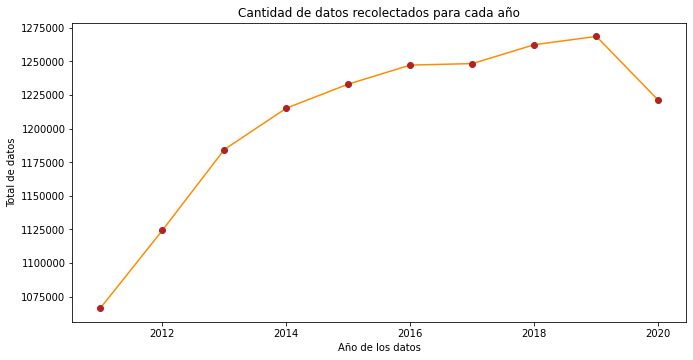

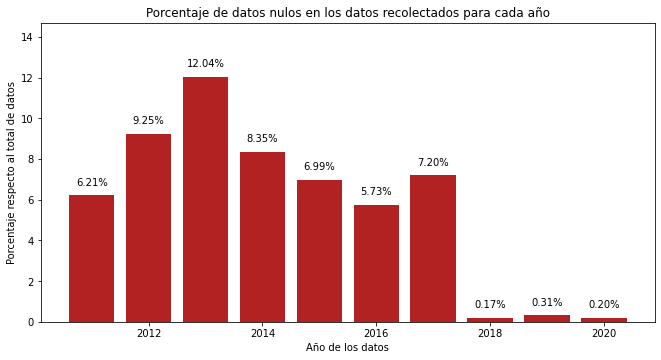

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [11, 5.5]


fig_total_datos = plt.figure()
fig_total_datos.clf()
ax_total_datos = fig_total_datos.add_subplot(111)
#ax_total_datos.bar(anno, l, align='center', alpha=0.7, color = 'darkorange', label = "Entradas en la tabla")
ax_total_datos.plot(anno, l, alpha=1, color = 'darkorange', label = "Entradas en la tabla")
ax_total_datos.plot(anno, l, 'o', alpha=1, color = 'firebrick', label = "Entradas en la tabla")
ax_total_datos.set_ylabel("Total de datos")
ax_total_datos.set_xlabel("Año de los datos")
ax_total_datos.set_title("Cantidad de datos recolectados para cada año")
#set off Scientific notation from Y-axis
ax_total_datos.get_yaxis().get_major_formatter().set_useOffset(False)
ax_total_datos.get_yaxis().get_major_formatter().set_scientific(False)
#ax_total_datos.legend(loc="best")
fig_total_datos.savefig("total_datos.png", transparent=False)
fig_total_datos.show()


fig_porcentaje_nulo = plt.figure()
fig_porcentaje_nulo.clf()
ax_porcentaje_nulo = fig_porcentaje_nulo.add_subplot(111)
graph = ax_porcentaje_nulo.bar(anno, porcentaje, align='center', color = 'firebrick', label = "Porcentaje de datos nulos")
ax_porcentaje_nulo.bar([2016], [14], align='center', alpha=0)
ax_porcentaje_nulo.set_ylabel("Porcentaje respecto al total de datos")
ax_porcentaje_nulo.set_xlabel("Año de los datos")
ax_porcentaje_nulo.set_title("Porcentaje de datos nulos en los datos recolectados para cada año")
#fig_porcentaje_nulo.legend(loc="upper left")
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    num = str(porcentaje[i]).split(".")
    t = num[0] +'.' + num[1][:2]+'%'
    plt.text(x+width/2,
             y+0.5+height*1,
             t,
             ha='center')
             #weight='bold')
    i+=1
fig_porcentaje_nulo.savefig("porcentaje_datos_nulos.png", transparent=False)
fig_porcentaje_nulo.show()

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

for df in d:
    #obtenemos el porcentaje de nulos en cada columna

    print('{:>35}'.format("Porcentaje de Datos NaN por Columna"))
    print('{:>35}'.format("-"*36))
    print('{:<25} | {:>12}'.format("Columna", "Porcentaje"))
    print('{:>35}'.format("-"*36))

    for key, value in df.isnull().sum().items():
      print('{:<25} | {:>12}%'.format(key, round(value*100/df.shape[0], 2)))

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
h1 = []
i = 2011

for df in d:
    dfh = (df.query("(cat_periodo != anio_ing_carr_ori or sem_ing_carr_ori!=1) and cat_periodo == anio_ing_carr_act and (nivel_global=='Pregrado' or nivel_global.isnull())")[["GEN_ALU","rango_edad", "area_conocimiento"]]
        .groupby(by=["GEN_ALU","rango_edad", "area_conocimiento"])
        .size()
        .reset_index()
        .rename(columns = {0:'total'})
        )
    dfh["anio"] = [i]*len(dfh)
    i+=1

    h1.append(dfh.copy())

#concatenación y mapeo
dfh1_original = (pd.concat(h1)[["GEN_ALU","rango_edad", "area_conocimiento", "total"]]
                 .groupby(by=["GEN_ALU","rango_edad", "area_conocimiento"])
                 .mean()
                 .reset_index()
                )
dfh1_original[["GEN_ALU"]] = dfh1_original[["GEN_ALU"]].replace({1:"Hombre", 2:"Mujer"})
dfh1_original = (dfh1_original.replace({"SIN INFORMACION": "Sin información", "Ciencias Sociales": "C. Sociales"}))

#### Mapeados

In [ ]:
d = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
h2 = []
i = 2011

for df in d:
    try:
        dfh = df.query("vigencia_carrera!='NO VIGENTE'")
    except:
        dfh = df
    dfh = (dfh[["codigo_unico","region_sede", "nivel_carrera_2"]].copy())

    dfh["anio"] = [i]*len(dfh)
    i+=1
    h2.append(dfh)

dfh2_original = pd.concat(h2)

dfh2_original = (dfh2_original[["anio", "codigo_unico","region_sede", "nivel_carrera_2"]]
                 .drop_duplicates()[["anio", "region_sede", "nivel_carrera_2"]]
                 .groupby(["anio", "region_sede", "nivel_carrera_2"])
                 .size()
                 .reset_index()
                 .rename(columns = {0:'total'})
                 .fillna(0)
                )


### Resultados
#### Orginales

## Hipótesis 3

**¿Existe una correlación entre el costo de las carreras y su ubicación geográfica? ¿Varía esto a través de los años?**



### Resultados
#### Original

<ipython-input-140-a63f8394afda>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_h3_thru_time.show()


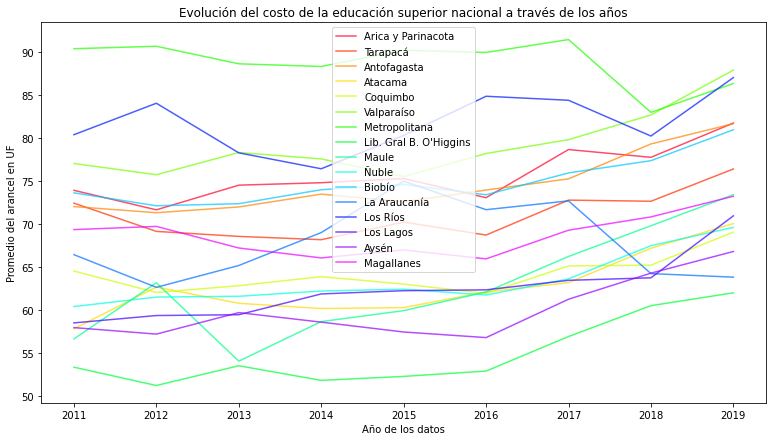

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 7]
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)
cmap = matplotlib.cm.get_cmap('gist_rainbow')
i_cmap = np.arange(0,2.0,0.0625).tolist()

fig_h3_thru_time = plt.figure()
fig_h3_thru_time.clf()
ax_h3_thru_time = fig_h3_thru_time.add_subplot(111)
for i in range(len(dfh3_mapeo_regiones)):
    region = list(dfh3_mapeo_regiones.iloc[i])[0]
    df = dfh3_original.query("region_sede==@region").copy()
    ax_h3_thru_time.plot(df["anio"], df["arancel_promedio_UF"], alpha=0.7, color = cmap(i_cmap[i]), label = region)
    #ax_h3_thru_time.plot(anno, l, 'o', alpha=1, color = 'firebrick', label = "Entradas en la tabla")
ax_h3_thru_time.set_ylabel("Promedio del arancel en UF")
ax_h3_thru_time.set_xlabel("Año de los datos")
ax_h3_thru_time.set_title("Evolución del costo de la educación superior nacional a través de los años")
#set off Scientific notation from Y-axis
ax_h3_thru_time.get_yaxis().get_major_formatter().set_useOffset(False)
ax_h3_thru_time.get_yaxis().get_major_formatter().set_scientific(False)
ax_h3_thru_time.legend(loc="best")
#fig_h3_thru_time.savefig("h3_tiempo.png", transparent=False)
fig_h3_thru_time.show()
